In [1]:
from matplotlib import pyplot as plt
import numpy as np
import random
import pandas as pd

url_mp = 'https://github.com/NathanDaud123/Puma/blob/main/Dataset/MP.csv?raw=true'
url_sn = 'https://github.com/NathanDaud123/Puma/blob/main/Dataset/SN.csv?raw=true'
url_sh = 'https://github.com/NathanDaud123/Puma/blob/main/Dataset/SH.csv?raw=true'
url_sy = 'https://github.com/NathanDaud123/Puma/blob/main/Dataset/SY.csv?raw=true'
url_plk = 'https://github.com/NathanDaud123/Puma/blob/main/Dataset/PLK.csv?raw=true'

mp = pd.read_csv(url_mp)
sn = pd.read_csv(url_sn)
sh = pd.read_csv(url_sh)
sy = pd.read_csv(url_sy)
plk = pd.read_csv(url_plk)

def normalize(value, min_old, max_old, min_new, max_new):
    return round(1 + ((value - min_old) / (max_old - min_old)) * (max_new - min_new))

def hitung_total_karbo(individual):
    total_karbo = 0
    for i in range(0, 15, 5):  # Start from 0, end at 15 with a step of 5
        total_karbo += mp['carbo'][individual[i]-1] + sn['carbo'][individual[i+1]-1] + sh['carbo'][individual[i+2]-1] + sy['carbo'][individual[i+3]-1] + plk['carbo'][individual[i+4]-1]
        # print(f'Carbo: {mp["carbo"][individual[i]-1]} + {sn["carbo"][individual[i+1]-1]} + {sh["carbo"][individual[i+2]-1]} + {sy["carbo"][individual[i+3]-1]} + {plk["carbo"][individual[i+4]-1]}')

    return total_karbo

def hitung_total_protein(individual):
    total_protein = 0
    for i in range(0, 15, 5):
        total_protein += mp['protein'][individual[i]-1] + sn['protein'][individual[i+1]-1] + sh['protein'][individual[i+2]-1] + sy['protein'][individual[i+3]-1] + plk['protein'][individual[i+4]-1]
        # print(f'Protein: {mp["protein"][individual[i]-1]} + {sn["protein"][individual[i+1]-1]} + {sh["protein"][individual[i+2]-1]} + {sy["protein"][individual[i+3]-1]} + {plk["protein"][individual[i+4]-1]}')

    return total_protein

def hitung_total_energy(individual):
    total_energy = 0
    for i in range(0, 15, 5):
        total_energy += mp['energy'][individual[i]-1] + sn['energy'][individual[i+1]-1] + sh['energy'][individual[i+2]-1] + sy['energy'][individual[i+3]-1] + plk['energy'][individual[i+4]-1]
        # print(f'Energy: {mp["energy"][individual[i]-1]} + {sn["energy"][individual[i+1]-1]} + {sh["energy"][individual[i+2]-1]} + {sy["energy"][individual[i+3]-1]} + {plk["energy"][individual[i+4]-1]}')

    return total_energy

def hitung_total_lemak(individual):
    total_fat = 0
    for i in range(0, 15, 5):
        total_fat += mp['fat'][individual[i]-1] + sn['fat'][individual[i+1]-1] + sh['fat'][individual[i+2]-1] + sy['fat'][individual[i+3]-1] + plk['fat'][individual[i+4]-1]
        # print(f'Fat: {mp["fat"][individual[i]-1]} + {sn["fat"][individual[i+1]-1]} + {sh["fat"][individual[i+2]-1]} + {sy["fat"][individual[i+3]-1]} + {plk["fat"][individual[i+4]-1]}')

    return total_fat

def fitness_func(individual):
    kebutuhan_energi = 2249.4046
    kebutuhan_karbo = 377.41069
    kebutuhan_protein = 94.3526725
    kebutuhan_lemak = 64.7834611
    total_karbo = hitung_total_karbo(individual)
    total_energi = hitung_total_energy(individual)
    total_protein = hitung_total_protein(individual)
    total_lemak = hitung_total_lemak(individual)

    penalty_karbo = abs(kebutuhan_karbo - total_karbo)
    penalty_energi = abs(kebutuhan_energi - total_energi)
    penalty_protein = abs(kebutuhan_protein - total_protein)
    penalty_lemak = abs(kebutuhan_lemak - total_lemak)

    total_penalty = penalty_karbo + penalty_energi + penalty_protein + penalty_lemak

    return 1000 / total_penalty  # Adjusted to avoid division by zero

def total_penalty_ok(individual):
    kebutuhan_energi = 2249.4046
    kebutuhan_karbo = 377.41069
    kebutuhan_protein = 94.3526725
    kebutuhan_lemak = 64.7834611
    total_karbo = hitung_total_karbo(individual)
    total_energi = hitung_total_energy(individual)
    total_protein = hitung_total_protein(individual)
    total_lemak = hitung_total_lemak(individual)

    penalty_karbo = abs(kebutuhan_karbo - total_karbo)
    penalty_energi = abs(kebutuhan_energi - total_energi)
    penalty_protein = abs(kebutuhan_protein - total_protein)
    penalty_lemak = abs(kebutuhan_lemak - total_lemak)

    total_penalty = penalty_karbo + penalty_energi + penalty_protein + penalty_lemak

    print(f'Energy = {total_energi}')
    print(f'Karbo = {total_karbo}')
    print(f'Protein = {total_protein}')
    print(f'Lemak = {total_lemak}')
    print(f'Penalty best = {total_penalty}')

def daftar_makanan(best):
    print("Makan Pagi")
    print(f'Makanan pokok\t = {mp["menu"][best[0]-1]}')
    print(f'Sumber Nabati\t = {sn["menu"][best[1]-1]}')
    print(f'Sumber Hewani\t = {sh["menu"][best[2]-1]}')
    print(f'Sayuran\t\t = {sy["menu"][best[3]-1]}')
    print(f'Pelengkap\t = {plk["menu"][best[4]-1]}')
    print("Makan Siang")
    print(f'Makanan pokok\t = {mp["menu"][best[5]-1]}')
    print(f'Sumber Nabati\t = {sn["menu"][best[6]-1]}')
    print(f'Sumber Hewani\t = {sh["menu"][best[7]-1]}')
    print(f'Sayuran\t\t = {sy["menu"][best[8]-1]}')
    print(f'Pelengkap\t = {plk["menu"][best[9]-1]}')
    print("Makan Malam")
    print(f'Makanan pokok\t = {mp["menu"][best[10]-1]}')
    print(f'Sumber Nabati\t = {sn["menu"][best[11]-1]}')
    print(f'Sumber Hewani\t = {sh["menu"][best[12]-1]}')
    print(f'Sayuran\t\t = {sy["menu"][best[13]-1]}')
    print(f'Pelengkap\t = {plk["menu"][best[14]-1]}')

# Set seed untuk reproducibility
# seed_value = 778
# np.random.seed(seed_value)

class Particle:
    def __init__(self, dim, minx, maxx, seed_value, w,c1,c2):
        random.seed(seed_value)
        self.position = np.random.randint(low=minx, high=maxx, size=dim)
        self.velocity = np.random.uniform(low=-0.1, high=0.1, size=dim)
        self.best_position = np.copy(self.position)
        self.best_fitness = -np.inf
        self.best_iter = 0  # tambahkan ini

    def update_velocity(self, global_best, w, c1, c2):
        r1 = np.random.uniform(size=self.position.shape)
        r2 = np.random.uniform(size=self.position.shape)
        # print(r1)
        # print(r2)
        social = c1 * r1 * (global_best - self.position)
        cognitive = c2 * r2 * (self.best_position - self.position)
        self.velocity = w * self.velocity + social + cognitive

    def update_position(self, minx, maxx):
        self.position = self.position + self.velocity
        self.position = np.clip(self.position, minx, maxx).astype(int)

class PSO:
    def __init__(self, dim, minx, maxx, n_particles, w, seed_value,c1,c2):
        random.seed(seed_value)
        self.particles = [Particle(dim, minx, maxx, seed_value, w,c1,c2) for _ in range(n_particles)]
        self.global_best = np.random.randint(low=minx, high=maxx, size=dim)
        self.global_fitness = -np.inf
        self.fitness_values = []  # list untuk menyimpan nilai fitness
        self.w = w  # nilai w
        self.c1 = c1
        self.c2 = c2

    def set_fitness(self, particle, fitness):
        particle.best_fitness = fitness
        if fitness > self.global_fitness:
            self.global_fitness = fitness
            self.global_best = particle.position

    def run(self, fitness_func, n_iter, minx, maxx):
        for i in range(n_iter):
            for particle in self.particles:
                fitness = fitness_func(particle.position)
                if fitness > self.global_fitness:
                    self.set_fitness(particle, fitness)
                    self.best_iter = i  # update iterasi terbaik
                particle.update_velocity(self.global_best, self.w, self.c1, self.c2)
                particle.update_position(minx, maxx)
            self.fitness_values.append(self.global_fitness)


eksperimen ke - 1
iterasi ke - 2446
eksperimen ke - 2
iterasi ke - 1704
eksperimen ke - 3
iterasi ke - 2496
eksperimen ke - 4
iterasi ke - 2647
eksperimen ke - 5
iterasi ke - 1449
eksperimen ke - 6
iterasi ke - 1778
eksperimen ke - 7
iterasi ke - 1792
eksperimen ke - 8
iterasi ke - 1599
eksperimen ke - 9
iterasi ke - 2496
eksperimen ke - 10
iterasi ke - 3337
eksperimen ke - 1
iterasi ke - 671
eksperimen ke - 2
iterasi ke - 1236
eksperimen ke - 3
iterasi ke - 1682
eksperimen ke - 4
iterasi ke - 1315
eksperimen ke - 5
iterasi ke - 757
eksperimen ke - 6
iterasi ke - 1155
eksperimen ke - 7
iterasi ke - 705
eksperimen ke - 8
iterasi ke - 685
eksperimen ke - 9
iterasi ke - 1785
eksperimen ke - 10
iterasi ke - 1085
eksperimen ke - 1
iterasi ke - 902
eksperimen ke - 2
iterasi ke - 864
eksperimen ke - 3
iterasi ke - 677
eksperimen ke - 4
iterasi ke - 643
eksperimen ke - 5
iterasi ke - 654
eksperimen ke - 6
iterasi ke - 517
eksperimen ke - 7
iterasi ke - 517
eksperimen ke - 8
iterasi ke - 850
ek

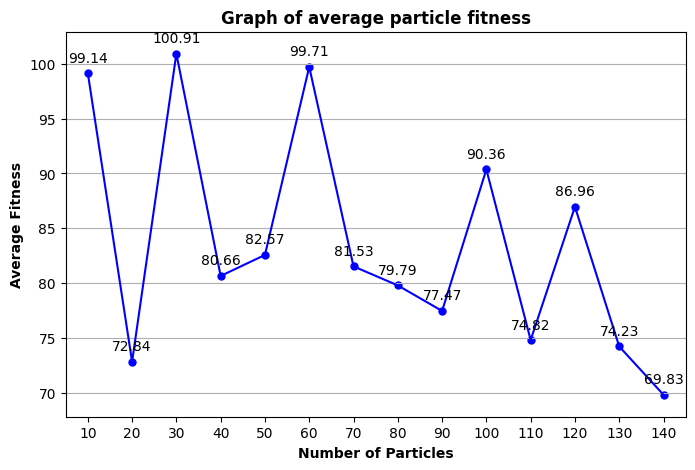

In [7]:
# Contoh penggunaan
dim = 15
minx = 1
maxx = 11
n_particles=[10,20,30,40,50,60,70,80,90,100,110,120,130,140]
# n_particles = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300] #populasi
kombinasi = [0.5, 1.4, 1.4]
# n_iter = 20  #generasi
# alternatif_w = [0.1, 0.3, 0.5, 0.7, 0.9]
result = {}
j=1
# Number of experiments for each w value
n_experiments = 10
# random.seed(GLOBAL_SEED)
# np.random.seed(GLOBAL_SEED)
for value in n_particles:
    # List to store the fitness values of all experiments for this w value
    GLOBAL_SEED = 0
    # print(value)
    all_experiments_fitness = []
    random.seed(GLOBAL_SEED)
    np.random.seed(GLOBAL_SEED)
    x=1
    # print(f'Parameter ke- -> {j}')
    for _ in range(n_experiments):
        # print(GLOBAL_SEED)
        # random.seed(seed_value)
        n_iter = 0  # Inisialisasi iterasi
        stability_count = 0  # Inisialisasi hitungan stabilitas
        max_stability_count = 12500  # Jumlah iterasi untuk dianggap stabil    
        pso = PSO(dim, minx, maxx, value, 0.5, GLOBAL_SEED, kombinasi[1], kombinasi[2])
        # for i, particle in enumerate(pso.particles):
        #     print(f'Position {i} :, {particle.position}')
        # pso.run(fitness_func, n_iter, minx, maxx)
        while True:  # Loop tak terbatas
            for particle in pso.particles:
                fitness = fitness_func(particle.position)
                if fitness > pso.global_fitness:
                    pso.set_fitness(particle, fitness)
                    pso.best_iter = n_iter  # update iterasi terbaik
                    stability_count = 0  # Reset hitungan stabilitas jika ada peningkatan
                else:
                    stability_count += 1  # Tambah hitungan stabilitas jika tidak ada peningkatan
                
                particle.update_velocity(pso.global_best, pso.w, pso.c1, pso.c2)
                particle.update_position(minx, maxx)

            pso.fitness_values.append(pso.global_fitness)
            
            if stability_count >= max_stability_count:
                print(f'eksperimen ke - {_+1}')
                print(f'iterasi ke - {n_iter}')
                break  # Berhenti jika mencapai stabilitas yang diinginkan

            n_iter += 1

        all_experiments_fitness.append(pso.global_fitness)
        GLOBAL_SEED = GLOBAL_SEED + 1
        x=x+1

    # Calculate the average fitness values across all experiments for this w value
    result[value] = sum(all_experiments_fitness) / n_experiments
    j = j + 1
    # print(list(result.keys()))
    # print(result[value])
    # print(list(result.values()))

# Plot the average fitness history for each population size
# Plotting the results
color = 'blue'
plt.figure(figsize=(8, 5))
x_values = list(result.keys())
y_values = list(result.values())

plt.scatter(x_values, y_values, s=25, c='blue', label='Data points')
plt.plot(x_values, y_values, color=color)  # Add this line
for i, txt in enumerate(y_values):
    plt.annotate(f'{txt:.2f}', (x_values[i], y_values[i]), textcoords="offset points", xytext=(0, 8), ha='center')
plt.ylim(min(y_values)-2, max(y_values)+2)
plt.xlim(min(x_values)-5, max(x_values)+5)
plt.xticks(x_values)
plt.title('Graph of average particle fitness', fontweight='bold')
plt.xlabel('Number of Particles', fontweight='bold')
plt.ylabel('Average Fitness', fontweight='bold')
# plt.legend(title="Population Size")
plt.grid(axis='y')
plt.show()

# print(f'Penalty best = {total_penalty_ok(pso.global_best)}')

0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9


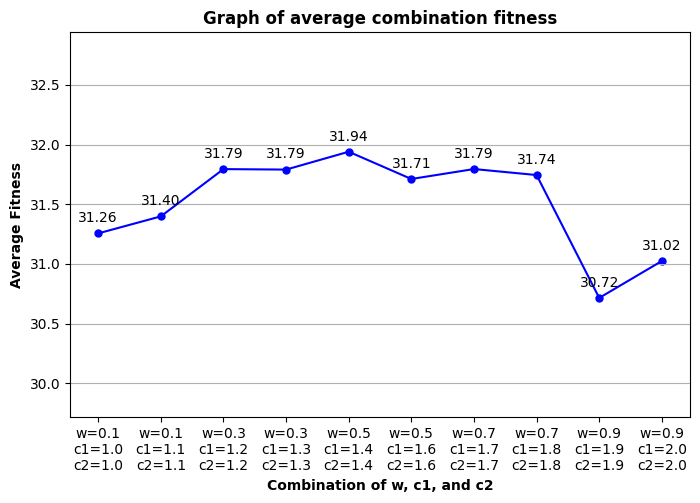

In [2]:
# Contoh penggunaan
dim = 15
minx = 1
maxx = 11
n_particles = 120 #populasi
n_iter = 280  #generasi
# alternatif_w = [0.1, 0.3, 0.5, 0.7, 0.9]
kombinasi = [[0.1, 1.0, 1.0],[0.1, 1.1, 1.1],[0.3, 1.2, 1.2],[0.3, 1.3, 1.3],[0.5, 1.4, 1.4],[0.5, 1.6, 1.6],[0.7, 1.7, 1.7],[0.7, 1.8, 1.8],[0.9, 1.9, 1.9],[0.9, 2.0, 2.0]]
result = {}
j=1
# Number of experiments for each w value
n_experiments = 10
# random.seed(GLOBAL_SEED)
# np.random.seed(GLOBAL_SEED)
for idx, value in enumerate(kombinasi):
    # List to store the fitness values of all experiments for this w value
    GLOBAL_SEED = 0
    # print(value)
    all_experiments_fitness = []
    random.seed(GLOBAL_SEED)
    np.random.seed(GLOBAL_SEED)
    x=1
    # print(f'Parameter ke- -> {j}')
    for _ in range(n_experiments):
        print(GLOBAL_SEED)
        # random.seed(seed_value)
        pso = PSO(dim, minx, maxx, n_particles, value[0], GLOBAL_SEED,value[1],value[2])
        # for i, particle in enumerate(pso.particles):
        #     print(f'Position {i} :, {particle.position}')
        pso.run(fitness_func, n_iter, minx, maxx)
        all_experiments_fitness.append(pso.global_fitness)
        GLOBAL_SEED = GLOBAL_SEED + 1
        x=x+1

    # Calculate the average fitness values across all experiments for this w value
    result[idx] = sum(all_experiments_fitness) / n_experiments
    j = j + 1
    # print(list(result.keys()))
    # print(result[value])
    # print(list(result.values()))

# Plot the average fitness history for each population size
# Plotting the results
color = 'blue'
plt.figure(figsize=(8, 5))
# Create a list of labels for each combination of Cr and Mr
labels = [f'w={w}\nc1={c1}\nc2={c2}' for w, c1, c2 in kombinasi]

# Create a list of x-values based on the number of combinations
x_values = range(len(kombinasi))
y_values = list(result.values())

plt.scatter(x_values, y_values, s=25, c='blue', label='Data points')
plt.plot(x_values, y_values, color=color)  # Add this line
for i, txt in enumerate(y_values):
    plt.annotate(f'{txt:.2f}', (x_values[i], y_values[i]), textcoords="offset points", xytext=(0, 8), ha='center')
plt.ylim(min(y_values)-1, max(y_values)+1)
# plt.xlim(min(x_values)-5, max(x_values)+5)
plt.xticks(x_values, labels)
# plt.title('Graph of average combination fitness', fontweight='bold')
plt.xlabel('Combination of w, c1, and c2', fontweight='bold')
plt.ylabel('Average Fitness', fontweight='bold')
# plt.legend(title="Population Size")
plt.grid(axis='y')
plt.show()

# print(f'Penalty best = {total_penalty_ok(pso.global_best)}')

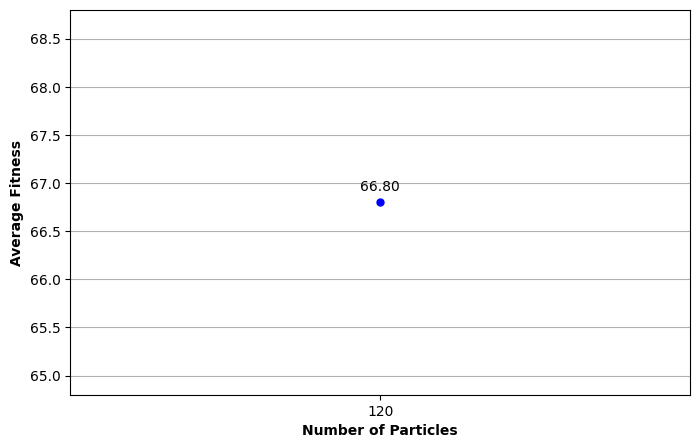

In [11]:
# Contoh penggunaan
dim = 15
minx = 1
maxx = 11
n_particles = [120] #populasi
kombinasi = [0.5, 1.4, 1.4]
n_iter = 280  #generasi
# alternatif_w = [0.1, 0.3, 0.5, 0.7, 0.9]
result = {}
j=1
# Number of experiments for each w value
n_experiments = 1
# random.seed(GLOBAL_SEED)
# np.random.seed(GLOBAL_SEED)
for value in n_particles:
    # List to store the fitness values of all experiments for this w value
    GLOBAL_SEED = 100
    # print(value)
    all_experiments_fitness = []
    random.seed(GLOBAL_SEED)
    np.random.seed(GLOBAL_SEED)
    x=1
    # print(f'Parameter ke- -> {j}')
    for _ in range(n_experiments):
        # print(GLOBAL_SEED)
        # random.seed(seed_value)
        pso = PSO(dim, minx, maxx, value, 0.5, GLOBAL_SEED, kombinasi[1], kombinasi[2])
        # for i, particle in enumerate(pso.particles):
        #     print(f'Position {i} :, {particle.position}')
        pso.run(fitness_func, n_iter, minx, maxx)
        all_experiments_fitness.append(pso.global_fitness)
        GLOBAL_SEED = GLOBAL_SEED + 1
        x=x+1

    # Calculate the average fitness values across all experiments for this w value
    result[value] = sum(all_experiments_fitness) / n_experiments
    j = j + 1
    # print(list(result.keys()))
    # print(result[value])
    # print(list(result.values()))

# Plot the average fitness history for each population size
# Plotting the results
color = 'blue'
plt.figure(figsize=(8, 5))
x_values = list(result.keys())
y_values = list(result.values())

plt.scatter(x_values, y_values, s=25, c='blue', label='Data points')
plt.plot(x_values, y_values, color=color)  # Add this line
for i, txt in enumerate(y_values):
    plt.annotate(f'{txt:.2f}', (x_values[i], y_values[i]), textcoords="offset points", xytext=(0, 8), ha='center')
plt.ylim(min(y_values)-2, max(y_values)+2)
plt.xlim(min(x_values)-5, max(x_values)+5)
plt.xticks(x_values)
# plt.title('Graph of average particle fitness', fontweight='bold')
plt.xlabel('Number of Particles', fontweight='bold')
plt.ylabel('Average Fitness', fontweight='bold')
# plt.legend(title="Population Size")
plt.grid(axis='y')
plt.show()

# print(f'Penalty best = {total_penalty_ok(pso.global_best)}')